In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [6]:
df.columns=['Signal','Density']

In [7]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<Axes: xlabel='Signal', ylabel='Density'>

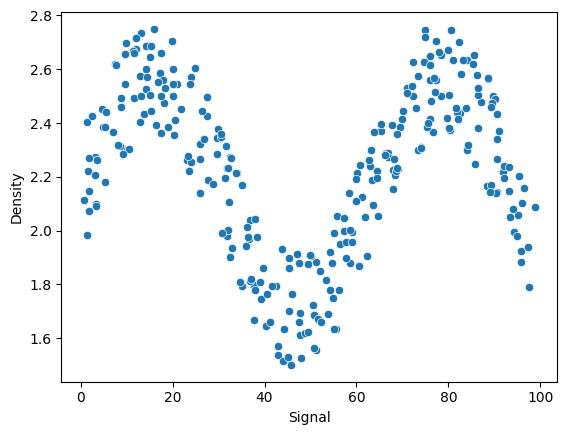

In [9]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [19]:
X=df['Signal'].values.reshape(-1,1)
# used when we have single feature, so that it can identify whether it is a single series or a dataframe
y=df['Density']

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
linear_model=LinearRegression()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [24]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [25]:
lr_pred=linear_model.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
mean_absolute_error(y_test,lr_pred)

0.2369211828242143

In [30]:
np.sqrt(mean_squared_error(y_test,lr_pred))

0.2928014017261052

In [31]:
#  lets visualize how linear regression fits the data by taking values in range 1-100

In [32]:
signal_range=np.arange(0,100)

In [36]:
signal_pred=linear_model.predict(signal_range.reshape(-1,1))

In [37]:
signal_pred

array([2.23857974, 2.23824122, 2.23790269, 2.23756417, 2.23722564,
       2.23688711, 2.23654859, 2.23621006, 2.23587154, 2.23553301,
       2.23519449, 2.23485596, 2.23451744, 2.23417891, 2.23384038,
       2.23350186, 2.23316333, 2.23282481, 2.23248628, 2.23214776,
       2.23180923, 2.2314707 , 2.23113218, 2.23079365, 2.23045513,
       2.2301166 , 2.22977808, 2.22943955, 2.22910102, 2.2287625 ,
       2.22842397, 2.22808545, 2.22774692, 2.2274084 , 2.22706987,
       2.22673134, 2.22639282, 2.22605429, 2.22571577, 2.22537724,
       2.22503872, 2.22470019, 2.22436167, 2.22402314, 2.22368461,
       2.22334609, 2.22300756, 2.22266904, 2.22233051, 2.22199199,
       2.22165346, 2.22131493, 2.22097641, 2.22063788, 2.22029936,
       2.21996083, 2.21962231, 2.21928378, 2.21894525, 2.21860673,
       2.2182682 , 2.21792968, 2.21759115, 2.21725263, 2.2169141 ,
       2.21657557, 2.21623705, 2.21589852, 2.21556   , 2.21522147,
       2.21488295, 2.21454442, 2.2142059 , 2.21386737, 2.21352

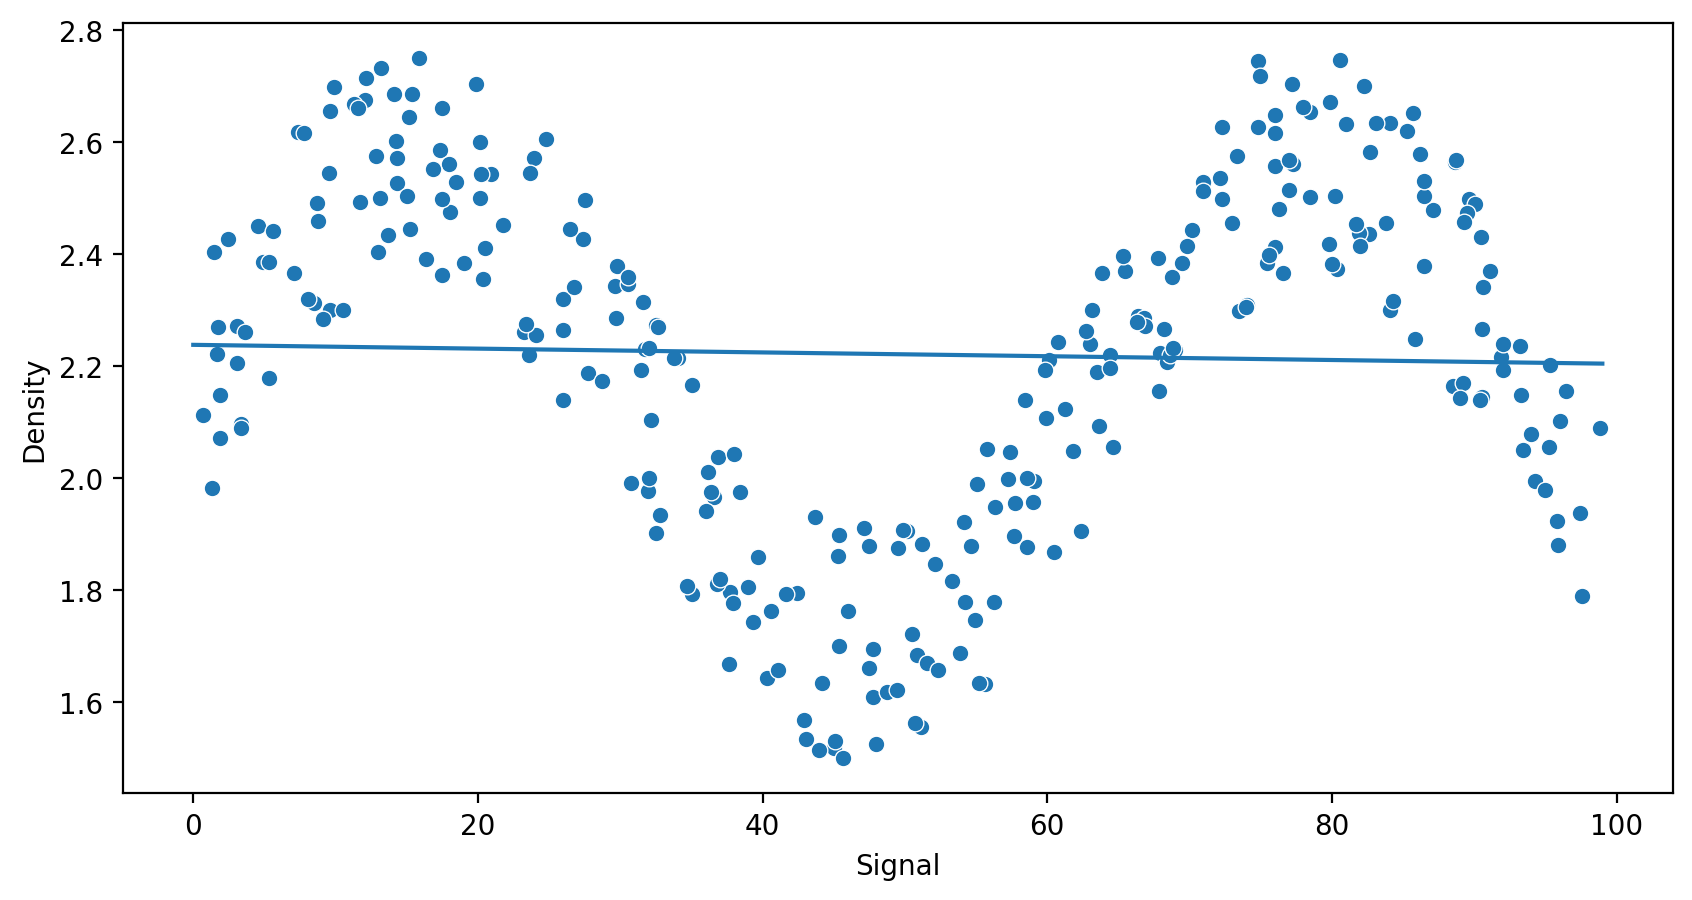

In [41]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

plt.plot(signal_range,signal_pred) # see how linear regression fits the line of best fit
#  It is not giving clarity.

# Linear Regression model cannot predict to this data
Here predictions are very close to average value, but actual values are varying .

# Polynomial Regression 
So now plotting curved line

In [42]:
#  making function to test multiple models for ease

In [61]:
def run_model(model,X_train,X_test,y_train,y_test):
    
        # Fit Model Training
        model.fit(X_train,y_train)
        
        # Getting metrics
        model_pred=model.predict(X_test)
        rmse=np.sqrt(mean_squared_error(y_test,model_pred))
        mae=mean_absolute_error(y_test,model_pred)
        print(f'RMSE : {rmse}')
        print(f'MAE : {mae}')

        # Plot Results Model Signal Range
        signal_range=np.arange(0,100)
        signal_pred=model.predict(signal_range.reshape(-1,1))
        plt.figure(figsize=(10,5),dpi=200)
        sns.scatterplot(x='Signal',y='Density',data=df,color='black')

        plt.plot(signal_range,signal_pred)
        
        

RMSE : 0.2928014017261052
MAE : 0.2369211828242143


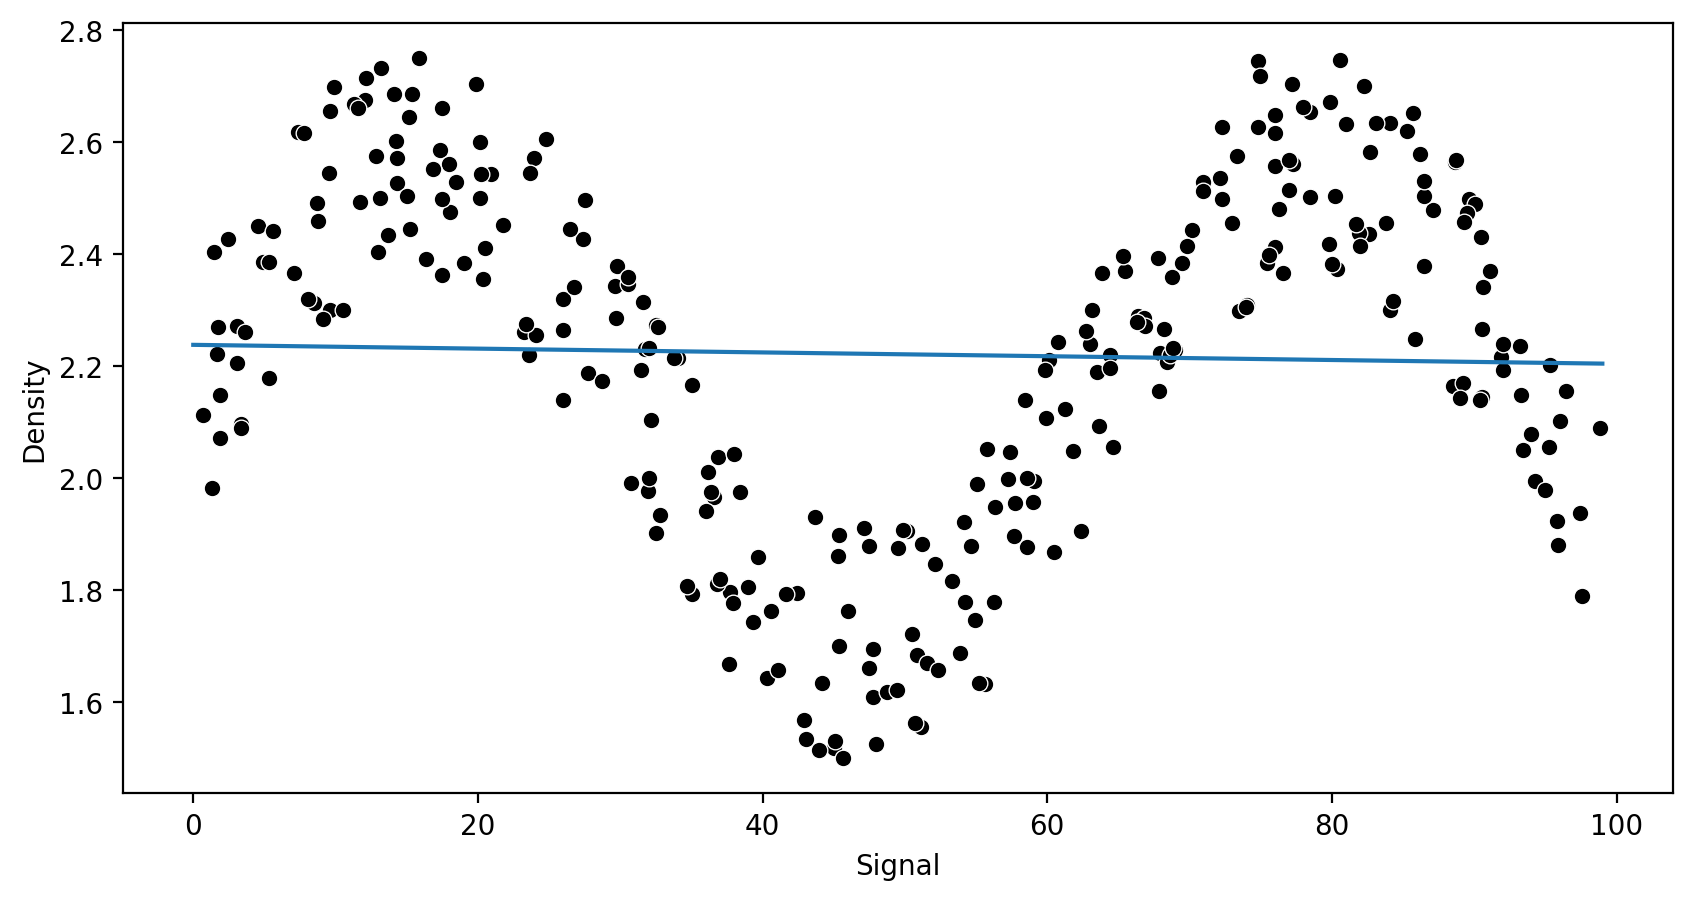

In [62]:
lr_model=LinearRegression()
run_model(lr_model,X_train,X_test,y_train,y_test)

In [63]:
# For polynomial ,we need to convert features to polynomial then pass it to linear regression model.
# So here we are using pipelining concept which will do fit & transform operations automatically with  only do fit with final
# estimator. 
# condition -> all estimators should do fit & transform opn.

In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [74]:
pipe= make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

RMSE : 0.13328124387882448
MAE : 0.11503333720555303


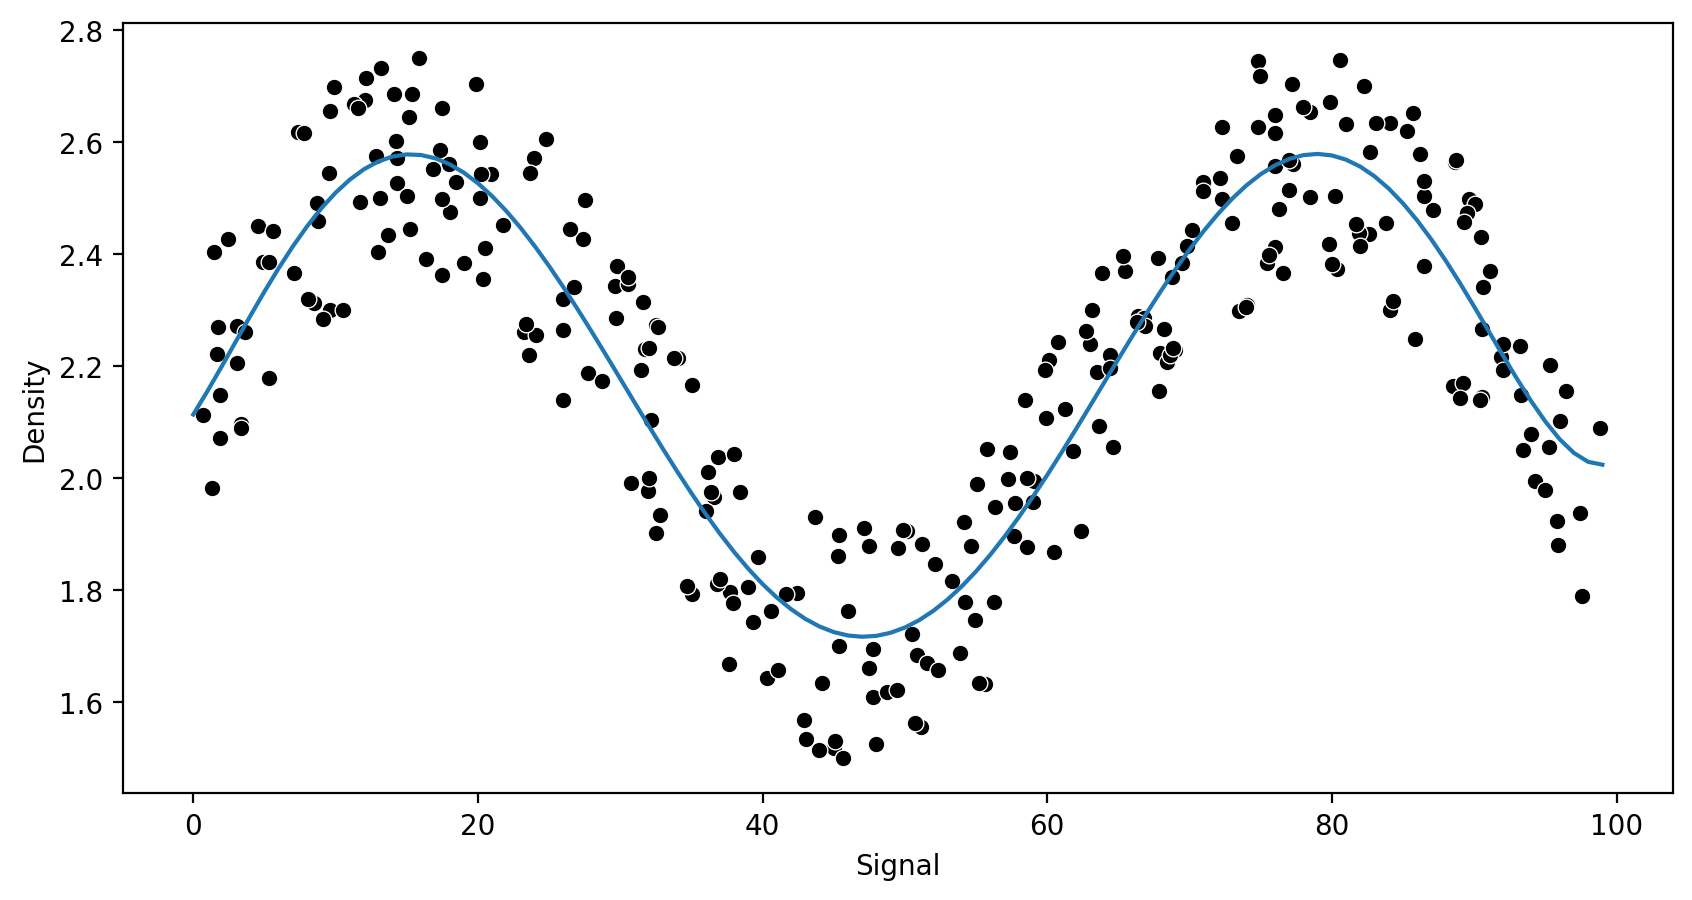

In [75]:
run_model(pipe,X_train,X_test,y_train,y_test)

In [77]:
#  now what if we increase the range beyond 100 ,we donot know how it will respond.Then we need to go to more robust
# models like KNN, decision-Tree,etc.

# KNN 

In [81]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.16153547162673088
MAE : 0.12817936228823248
RMSE : 0.1400166117231861
MAE : 0.11823219946159098
RMSE : 0.1408050741503751
MAE : 0.12059189553582521
RMSE : 0.1594705409490426
MAE : 0.1311012410531616


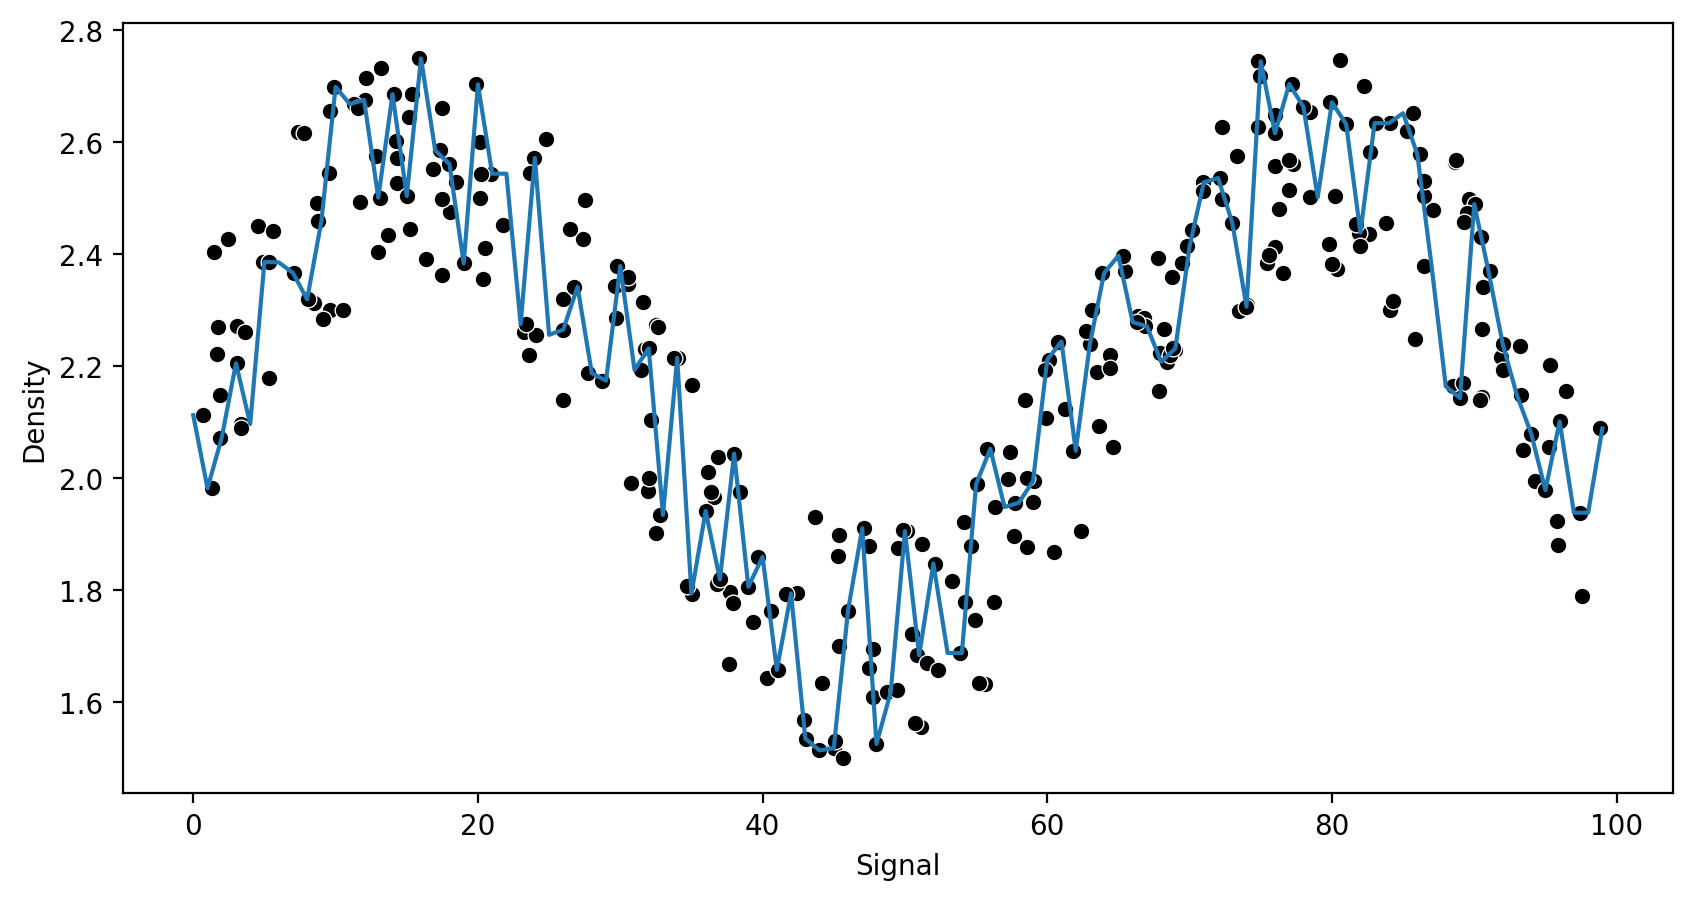

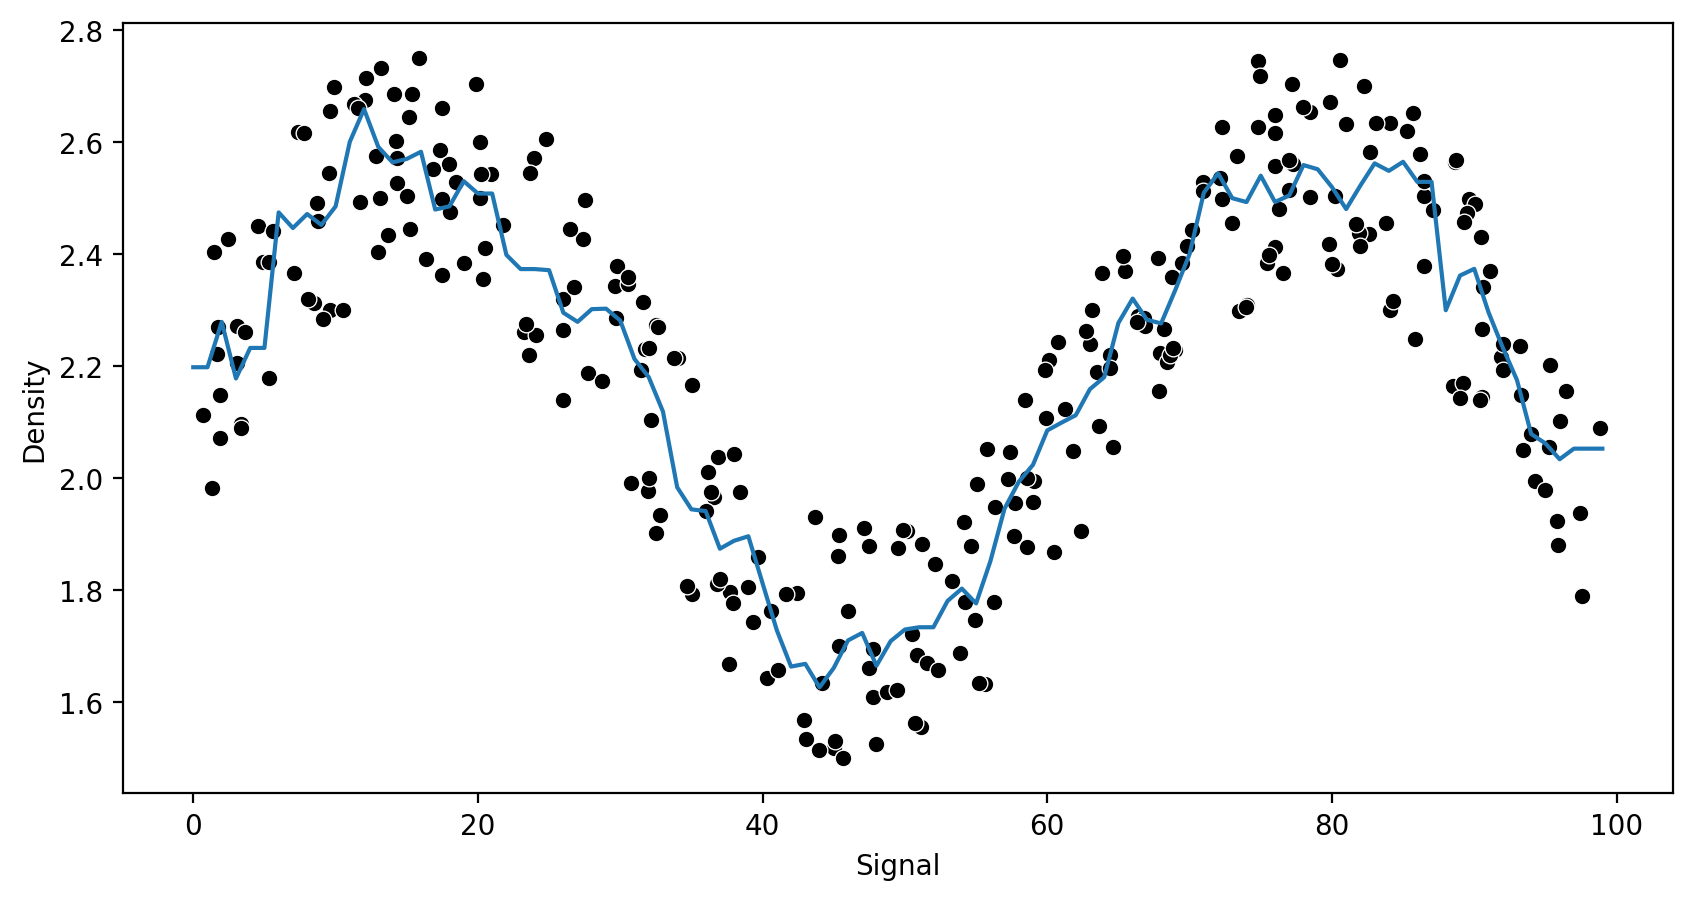

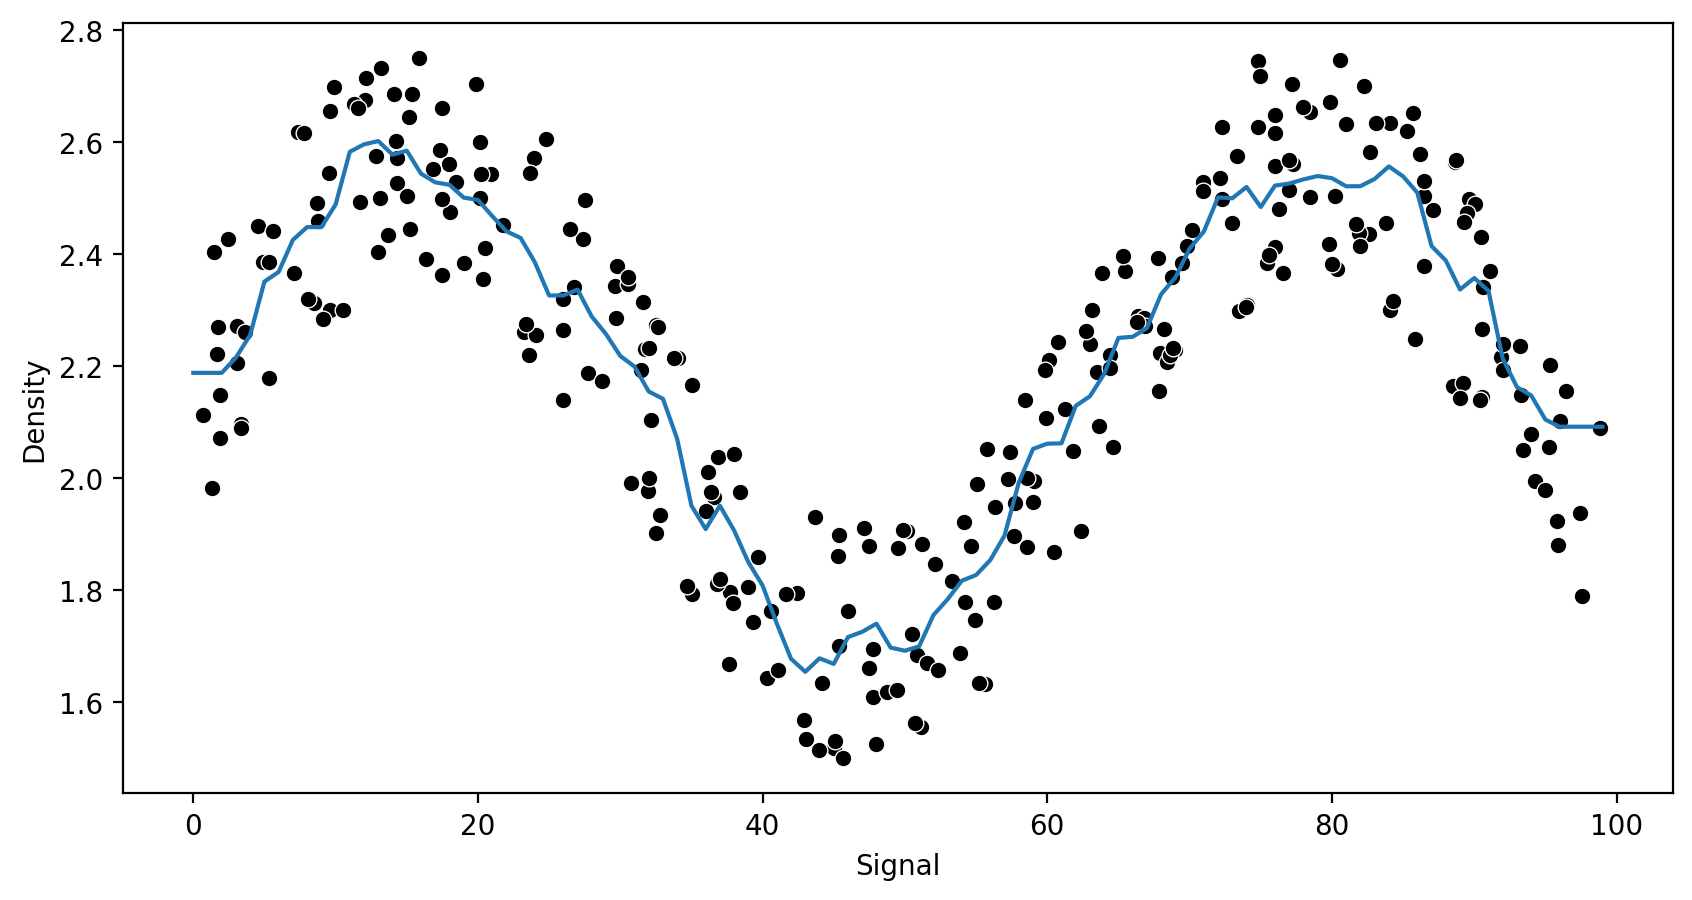

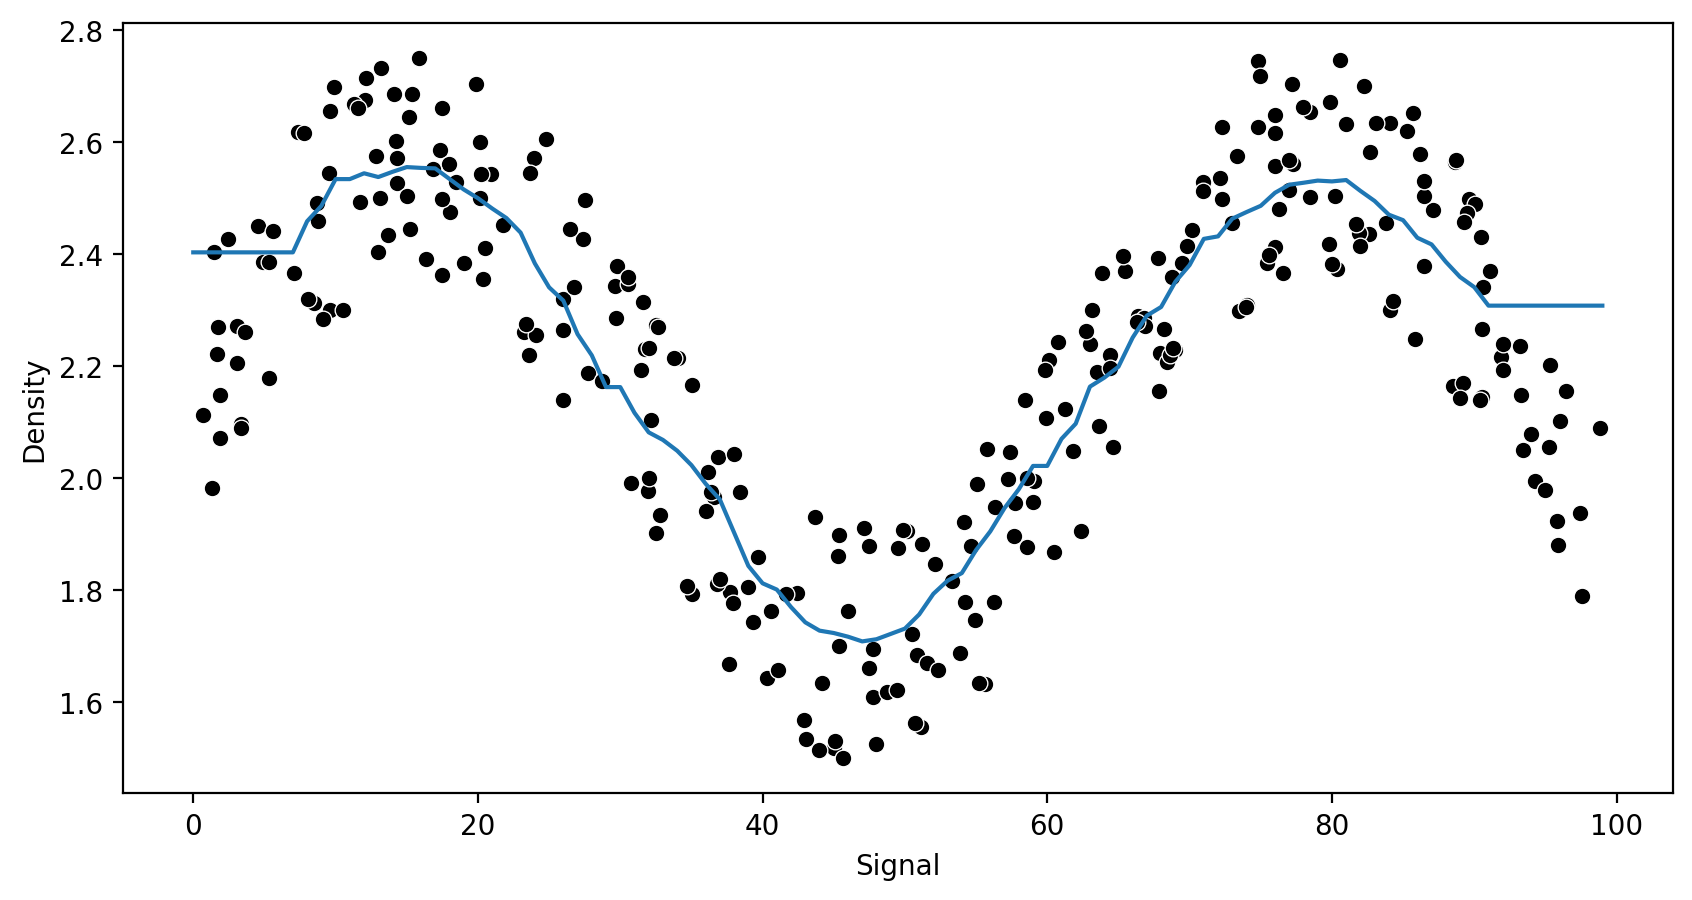

In [82]:
k_values=[1,5,10,30]
for n in k_values:
    model=KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,X_test,y_train,y_test)

# Support Vector Machine

In [83]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [85]:
svr= SVR()
param_grid={'C':[0.001,0.01,0.1,1,5,10,100],'gamma':['auto','scale']}

grid=GridSearchCV(svr,param_grid)

In [88]:
grid.best_params_

{'C': 100, 'gamma': 'scale'}

RMSE : 0.1307982152255794
MAE : 0.11132777080326473


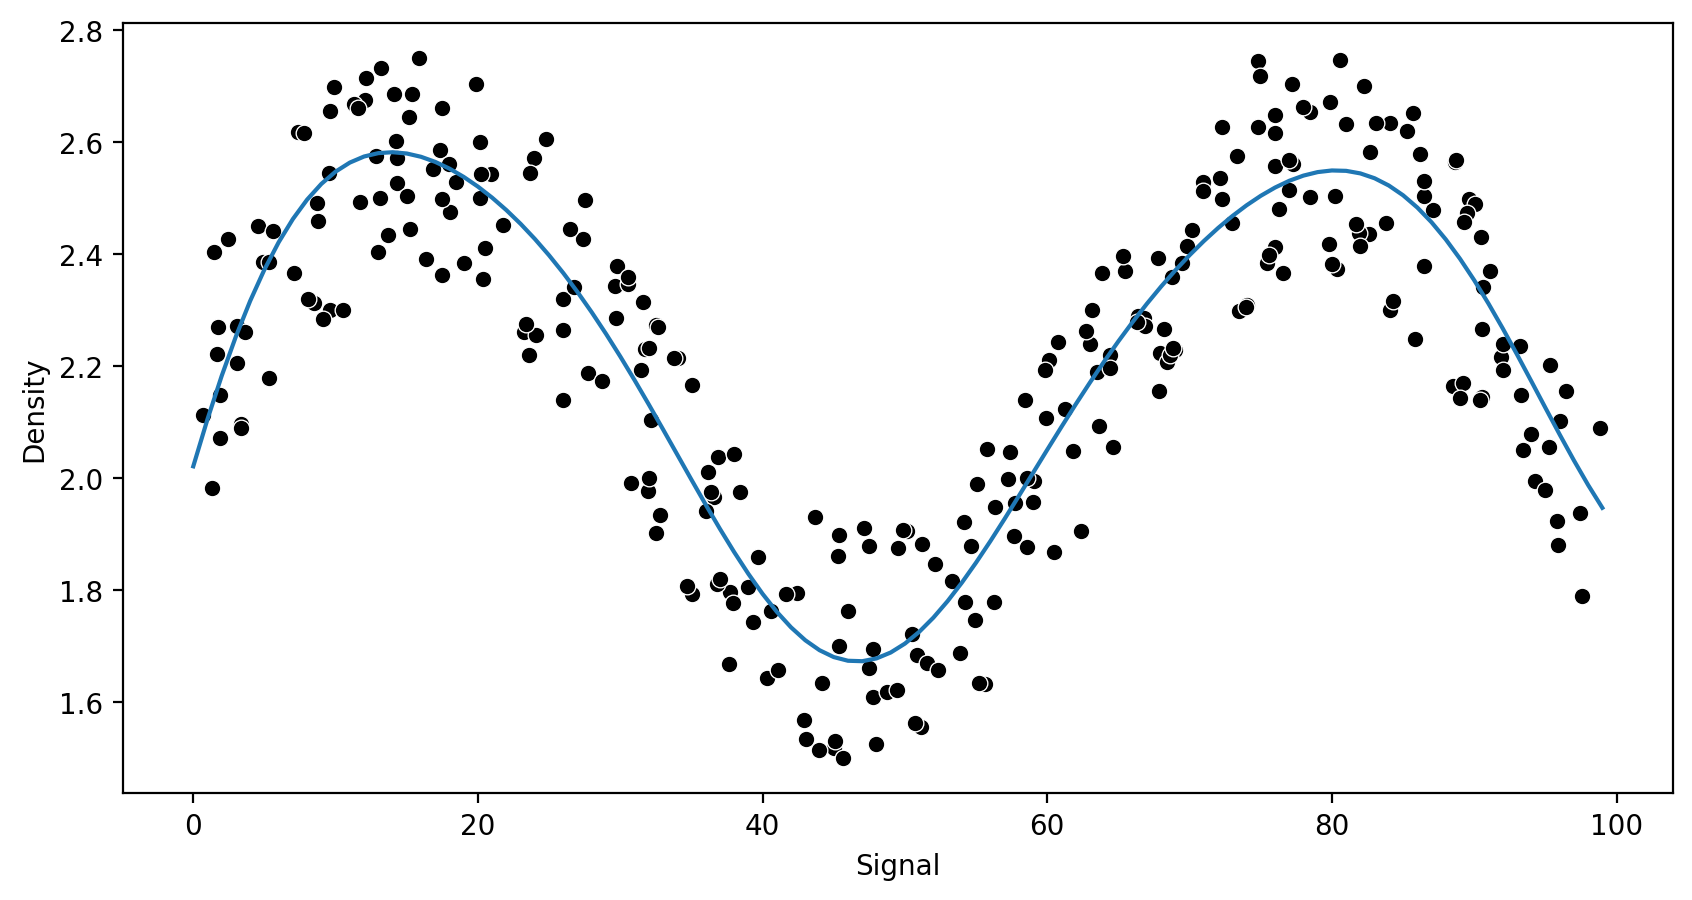

In [86]:
run_model(grid,X_train,X_test,y_train,y_test)

# Random Forest Model

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rfr=RandomForestRegressor(n_estimators=10)

RMSE : 0.1410448652759934
MAE : 0.11296291950410288


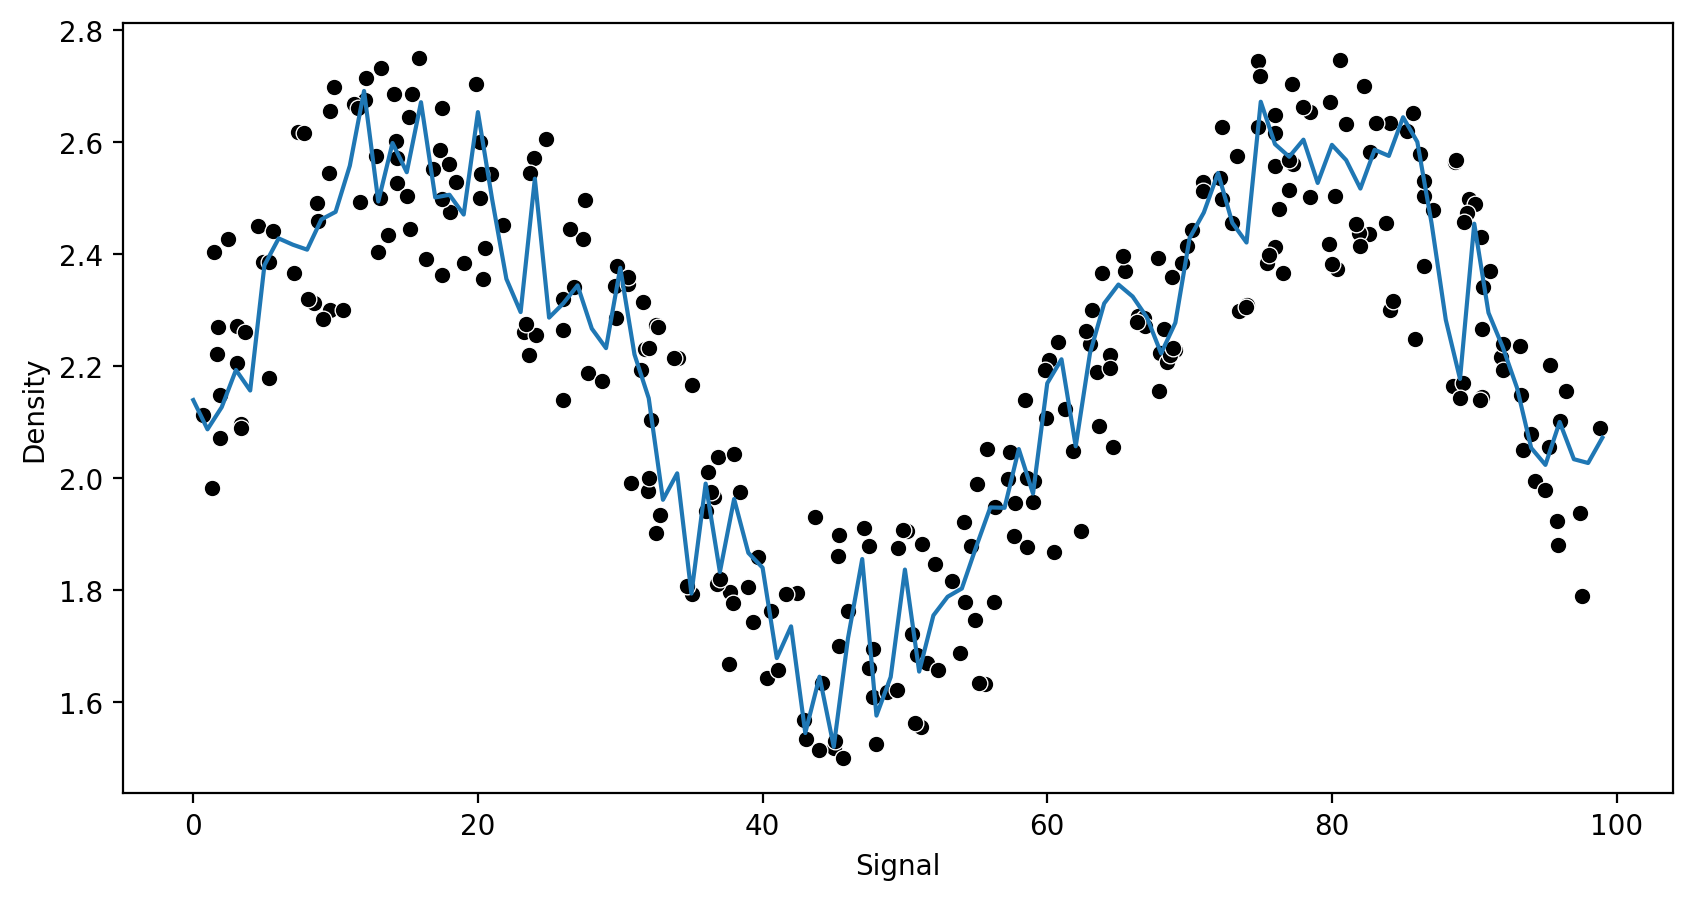

In [91]:
run_model(rfr,X_train,X_test,y_train,y_test)

# Thanks !